# Clustering With K Means

In [1]:
from sklearn.cluster import KMeans 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("Salary_Data.csv")
df.head

<bound method NDFrame.head of     YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0>

Text(0, 0.5, 'Salary')

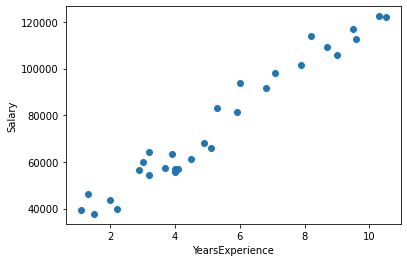

In [6]:
plt.scatter(df.YearsExperience,df['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

In [7]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['YearsExperience','Salary']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [8]:
df['cluster']=y_predicted
df.head()

,YearsExperience,Salary,cluster
0,1.1,39343.0,1
1,1.3,46205.0,1
2,1.5,37731.0,1
3,2.0,43525.0,1
4,2.2,39891.0,1


In [9]:

km.cluster_centers_

array([[9.40000000e+00, 1.14670286e+05],
       [3.21176471e+00, 5.45702353e+04],
       [6.50000000e+00, 9.16173333e+04]])

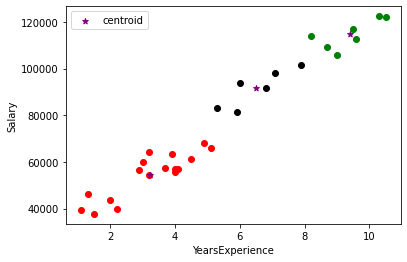

In [12]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.YearsExperience,df1['Salary'],color='green')
plt.scatter(df2.YearsExperience,df2['Salary'],color='red')
plt.scatter(df3.YearsExperience,df3['Salary'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()

### Preprocessing using min max scaler

In [13]:
scaler = MinMaxScaler()

scaler.fit(df[['Salary']])
df['Salary'] = scaler.transform(df[['Salary']])

scaler.fit(df[['YearsExperience']])
df['YearsExperience'] = scaler.transform(df[['YearsExperience']])

In [14]:
df.head()

,YearsExperience,Salary,cluster
0,0.000000,0.019041,1
1,0.021277,0.100094,1
2,0.042553,0.000000,1
3,0.095745,0.068438,1
4,0.117021,0.025514,1


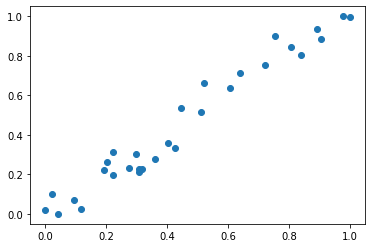

In [16]:
plt.scatter(df.YearsExperience,df['Salary'])

In [19]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['YearsExperience','Salary']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [20]:
df['cluster']=y_predicted
df.head()

,YearsExperience,Salary,cluster
0,0.000000,0.019041,0
1,0.021277,0.100094,0
2,0.042553,0.000000,0
3,0.095745,0.068438,0
4,0.117021,0.025514,0


In [21]:
km.cluster_centers_

array([[0.22465582, 0.19890427],
       [0.57446809, 0.63650287],
       [0.88297872, 0.90880328]])

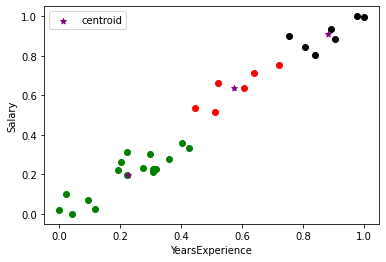

In [22]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.YearsExperience,df1['Salary'],color='green')
plt.scatter(df2.YearsExperience,df2['Salary'],color='red')
plt.scatter(df3.YearsExperience,df3['Salary'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()

## Elbow plot

In [23]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['YearsExperience','Salary']])
    sse.append(km.inertia_)

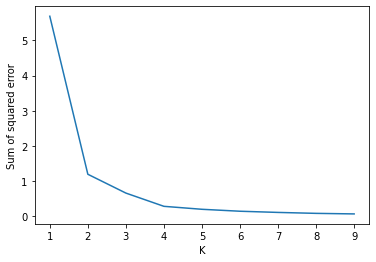

In [24]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)